In [1]:
#Standard Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import factorial, sqrt, pi
np.random.seed(42)

In [13]:
#1 ) Random Variables
#Demonstration: Discrete(Bernoulli) and continuous (Normal) random variables; compute mean and variance

#Bernoulli (Discrete) Example 
p =0.3
n_samples = 10000
bern = np.random.binomial(1, p, size=n_samples)    #Bernoulli as Binomial
print('Bernoulli Sample Mean (approax p):',bern.mean())
print('Bernoulli Sample Var (approax p(1-p)):',bern.var())


#Normal Continuous Example
mu, sigma = 2.0, 1.5
norm_samples = np.random.normal(mu, sigma, size=n_samples)
print("\n\nNormal Sample mean (approx mu):", norm_samples.mean())
print("Normal Sample var (approx simga^2):", norm_samples.var())

Bernoulli Sample Mean (approax p): 0.3041
Bernoulli Sample Var (approax p(1-p)): 0.21162319


Normal Sample mean (approx mu): 2.006646789675847
Normal Sample var (approx simga^2): 2.2210957924796486


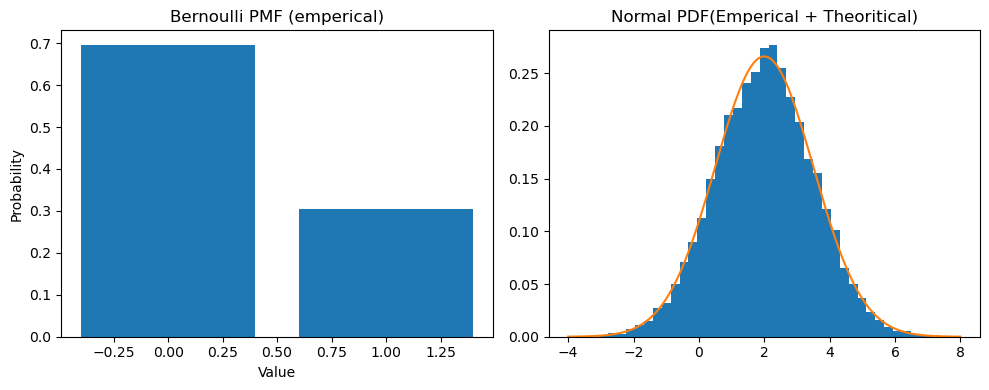

In [ ]:
#Plot PDFS, PMFs
fig, axes = plt.subplots(1, 2, figsize=(10,4)) 

#Bernoulli 
vals, counts = np.unique(bern, return_counts = True)
axes[0].bar(vals, counts/len(bern))
axes[0].set_title('Bernoulli PMF (emperical)')
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Probability")


#Normal PDF (emperical Histogram + theoritical PDF)
axes[1].hist(norm_samples, bins=40, density=True)
x = np.linspace(mu-4*sigma, mu+4*sigma, 200)
axes[1].plot(x, stats.norm.pdf(x, mu, sigma)) 
axes[1].set_title("Normal PDF(Emperical + Theoritical)")
plt.tight_layout()
plt.show()

In [17]:
#Binomial example
n, p = 10, 0.4
k = np.arange(0, n+1)
pmf_binom = stats.binom.pmf(k, n, p)
 
print("Binomal Theoritical Mean:",stats.binom.mean(n, p))
print("Binomal Theoritical Var:",stats.binom.var(n, p))

#Poisson Example
lam = 3.0          #Lambda
k_p = np.arange(0, 15)
pmf_pois = stats.poisson.pmf(k_p, lam)
print("\n\nBinomal Theoritical Mean:",stats.poisson.mean(lam))
print("Binomal Theoritical Var:",stats.poisson.var(lam))

Binomal Theoritical Mean: 4.0
Binomal Theoritical Var: 2.4


Binomal Theoritical Mean: 3.0
Binomal Theoritical Var: 3.0


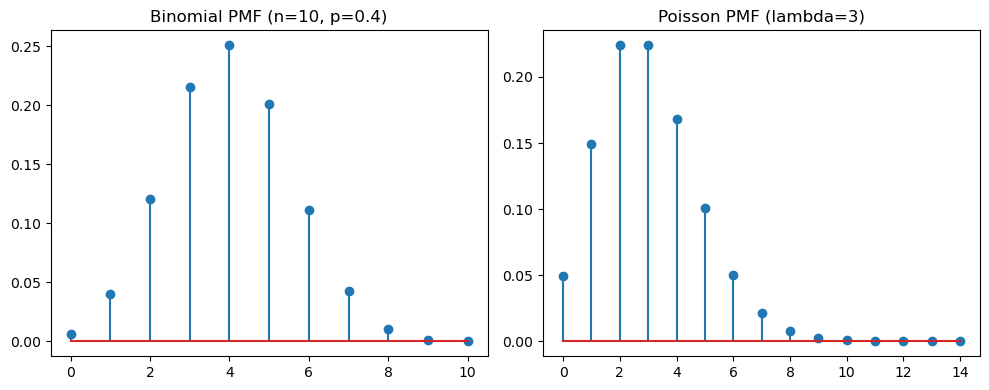

In [19]:
#Plot PMFs
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].stem(k, pmf_binom)
ax[0].set_title("Binomial PMF (n=10, p=0.4)")
ax[1].stem(k_p, pmf_pois)
ax[1].set_title('Poisson PMF (lambda=3)')
plt.tight_layout()
plt.show()

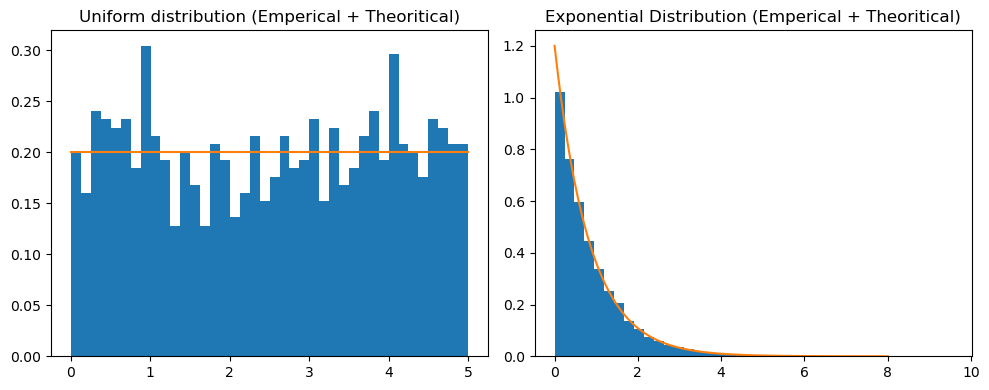

In [24]:
#Uniform (a,b)
a, b = 0, 5
uni_samps = np.random.uniform(a, b, size=1000)
x = np.linspace(a, b, 200)

#Exponential 
lam = 1.2
exp_samps = np.random.exponential(1/lam, size=10000)
x_exp = np.linspace(0, 8, 200)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(uni_samps, bins = 40, density=True)
ax[0].plot(x, stats.uniform.pdf(x, a, b-a))
ax[0].set_title('Uniform distribution (Emperical + Theoritical)')

ax[1].hist(exp_samps, bins=40, density=True)
ax[1].plot(x_exp, stats.expon.pdf(x_exp, scale=1/lam))
ax[1].set_title('Exponential Distribution (Emperical + Theoritical)')
plt.tight_layout()
plt.show()

Emperical Covariance: 0.6075462963123869
Emperical Correlation: 0.6032932967779996


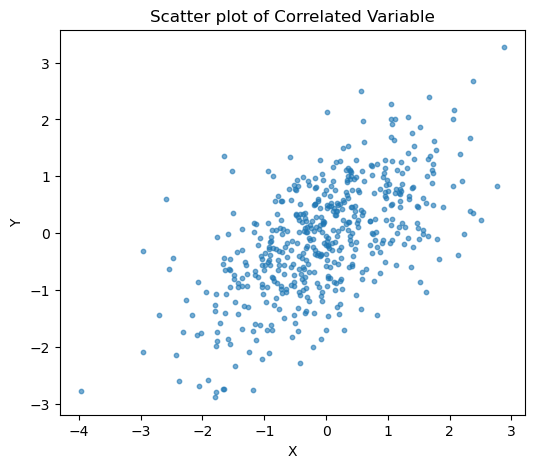

In [26]:
#Multiple Random Variables:

#1) Bir
#Simulate correlated variables using Covariance Matrix
mean = [0, 0]
cov = [[1.0, 0.6], [0.6, 1.0]]       #Covariance Matrix with Positive Correlation
samples = np.random.multivariate_normal(mean, cov, size=5000)
x = samples[: ,0]
y = samples[: ,1]

print("Emperical Covariance:",np.cov(x,y)[0,1])
print("Emperical Correlation:",np.corrcoef(x,y)[0,1])

#Scatter Plot
plt.figure(figsize=(6,5))
plt.scatter(x[:500], y[:500], s=10, alpha=0.6)         #Aplha is Traparency
plt.title("Scatter plot of Correlated Variable")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

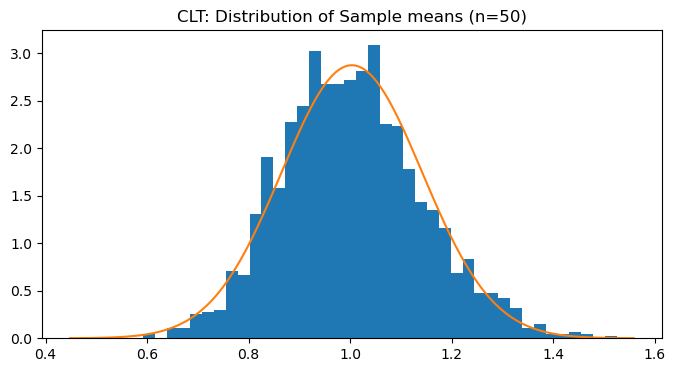

Sample means mean: 1.0032638674549739 Standard Deviation: 0.13880502887943172


In [32]:
# CLT Demonstration
pop = np.random.exponential(scale = 1.0, size = 200000)     #Population (Skew)
sample_size = 50
n_trials = 2000
means = [np.mean(np.random.choice(pop, sample_size)) for _ in range(n_trials)]

plt.figure(figsize=(8,4))
plt.hist(means, bins=40, density=True)

#Overlay Normal with same Mean and Variance
mu_hat = np.mean(means)
sigma_hat = np.std(means)
x = np.linspace(mu_hat-4*sigma_hat, mu_hat+4*sigma_hat, 200)
plt.plot(x, stats.norm.pdf(x, mu_hat, sigma_hat))
plt.title(f'CLT: Distribution of Sample means (n={sample_size})')
plt.show()

print("Sample means mean:",mu_hat,"Standard Deviation:",sigma_hat)